First we import the packages we'll need

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: load the dataset

Next we load the dataset from the csv

In [115]:
file_location = 'Dataset/titanic.csv'

titanic_dataframe = pd.read_csv(file_location)
titanic_dataframe.head()


,class,age,sex,survived
0,1st,29.00,female,survived
1,1st,2.00,female,died
2,1st,30.00,male,died
3,1st,25.00,female,died
4,1st,0.92,male,survived


## Step 2: Exploratory Data Analysis


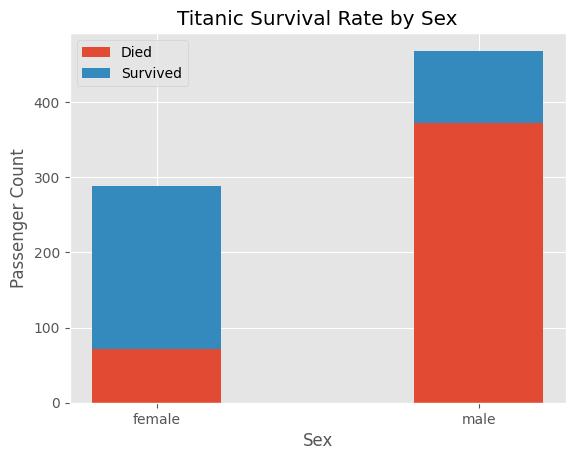

In [116]:
# Survival rate by gender

plt.style.use('ggplot')

sexes = ['female', 'male']
titanic_women = titanic_dataframe[titanic_dataframe['sex'] == 'female']
titanic_men = titanic_dataframe[titanic_dataframe['sex'] == 'male']

survived = [len(titanic_women[titanic_women['survived'] == 'survived']), len(titanic_men[titanic_men['survived'] == 'survived'])]
died = [len(titanic_women[titanic_women['survived'] == 'died']), len(titanic_men[titanic_men['survived'] == 'died'])] 

bar_width=0.4

plt.bar(sexes, died, label='Died', width=bar_width)
plt.bar(sexes, survived, label='Survived', bottom=died, width=bar_width)
plt.title('Titanic Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()


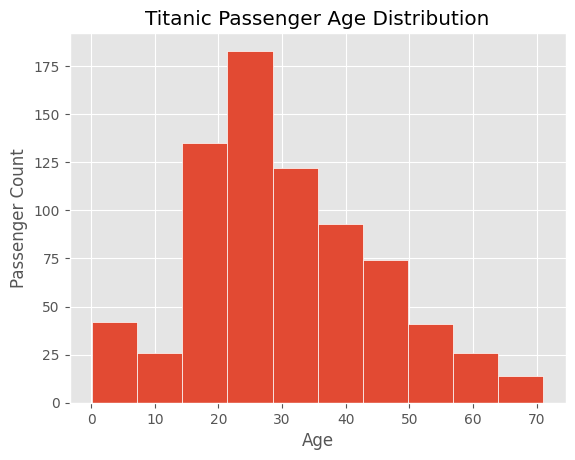

In [117]:
# Age distribution

titanic_survivors = titanic_dataframe[titanic_dataframe['survived'] == 'survived']
titanic_deaths = titanic_dataframe[titanic_dataframe['survived'] == 'died']

num_bins = 10

plt.hist(titanic_dataframe['age'], num_bins, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.title('Titanic Passenger Age Distribution')
plt.show()

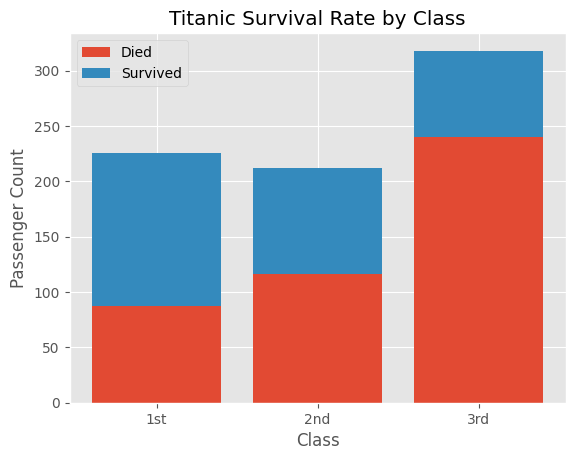

In [118]:
# Survival by class

classes = ['1st', '2nd', '3rd']
died_by_class = []
survived_by_class = []

for class_name in classes:
    died_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'died')]))
    survived_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'survived')]))

plt.bar(classes, died_by_class, label='Died')
plt.bar(classes, survived_by_class, label='Survived',bottom=died_by_class)

plt.title('Titanic Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()

### 3. Visualizing Age Distribution by Survival Status

#### 3.1 Histograms for Age Distribution

Create histograms to compare the age distributions of survivors and non-survivors.

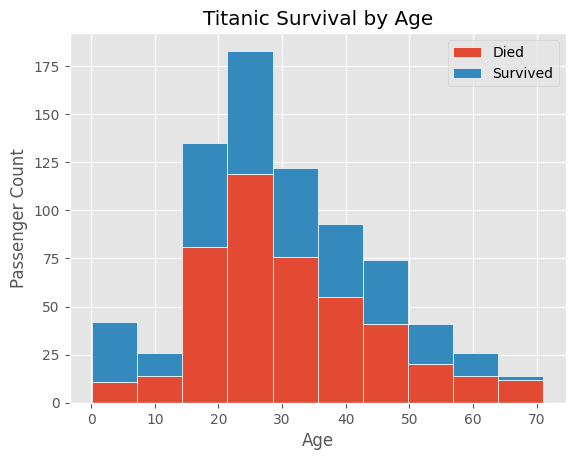

In [119]:
# histogram of age of survivors

titanic_survivors = titanic_dataframe[titanic_dataframe['survived'] == 'survived']
titanic_nonsurvivors = titanic_dataframe[titanic_dataframe['survived'] == 'died']

plt.hist([titanic_nonsurvivors['age'],titanic_survivors['age']],
    stacked=True,
    label = ['Died','Survived'],
    edgecolor='white',
    bins=num_bins)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.title('Titanic Survival by Age')
plt.show()


#### 3.2 Pyramid-style Age Distribution

Construct a pyramid-style plot to compare age distributions between survivors and non-survivors. This visualization will help highlight which age groups were more likely to survive.

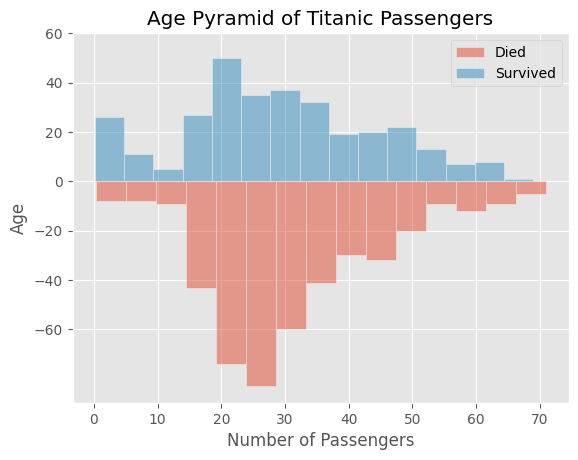

In [135]:
num_bins = 15
plt.hist(titanic_nonsurvivors['age'], bins=num_bins, label='Died', alpha=0.5, edgecolor='white', weights=[-1]*len(titanic_nonsurvivors))
plt.hist(titanic_survivors['age'], bins=num_bins, label='Survived', alpha=0.5, edgecolor='white')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')
plt.legend(loc='upper right')

# Fix the y-axis labels to be absolute values for clarity
plt.yticks([-60,-40,-20,0, 20, 40, 60])

plt.show()

#### 3.3 KDE Plots for Survival by Age ( for male, female and total)

- **KDE Plot for Survival by Age:**
Visualize the age distribution for survivors and non-survivors using KDE plots. This will provide a smooth estimate of the age distributions.

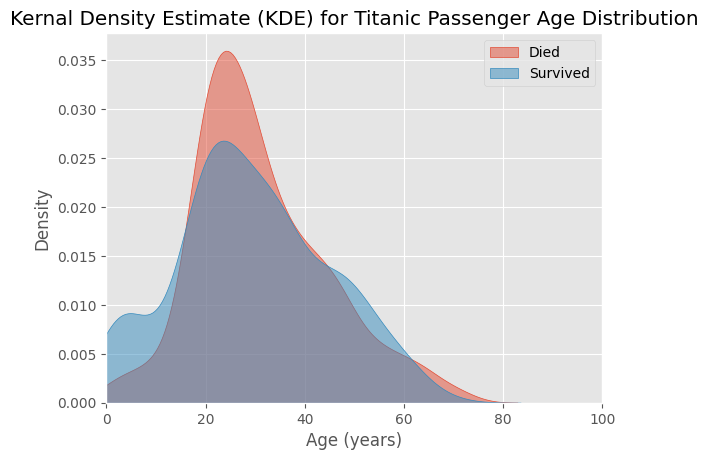

In [138]:
sns.kdeplot(titanic_nonsurvivors['age'], label='Died', fill=True, alpha=0.5)
sns.kdeplot(titanic_survivors['age'], label='Survived', fill=True, alpha=0.5)
plt.xlim(0,100)
plt.title('Kernal Density Estimate (KDE) for Titanic Passenger Age Distribution')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

### 4. Bar Graphs for Passenger Class

#### 4.1 Bar Graph of Passenger Class

Create a bar graph to show the distribution of passengers across different classes.

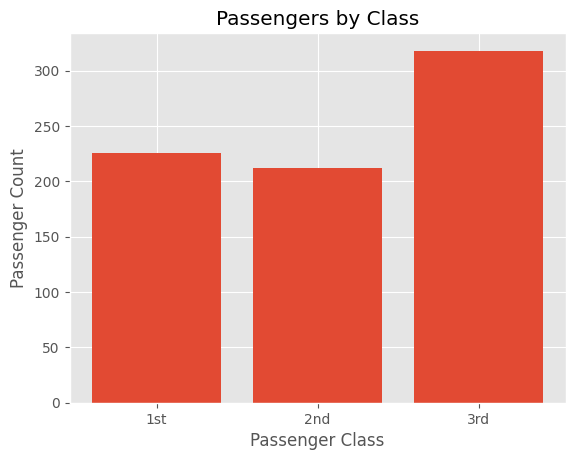

In [123]:

passenger_count_class = list(titanic_dataframe.groupby('class')['class'].count()))

plt.bar(classes, passenger_count_class)
plt.title('Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.show()

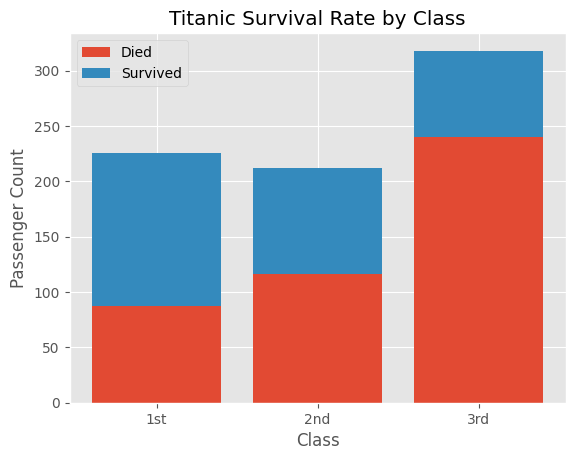

In [124]:
died_by_class = []
survived_by_class = []

for class_name in classes:
    died_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'died')]))
    survived_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'survived')]))

plt.bar(classes, died_by_class, label='Died')
plt.bar(classes, survived_by_class, label='Survived',bottom=died_by_class)

plt.title('Titanic Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()

### 5. Conclusion
We can see from the graphs above that some factors, such as sex and a class, were extremely relevant to survival rates on the Titanic. Women made up almost two thirds of the survivors, even though they represented less than half the total passengers. Those in first class were more likely to survive than those in second class, and both were *much* more likely to survive than those in third class. Age also seems to have been somewhat relevant, though the effect was not as strong. Most age categories are roughly evenly split in terms of how many survived, except for two: young children (less than 10 years old or so), and young adults in their twenties. The former had a very high survival rate, while the latter is pretty low.